In [1]:
# Dan Lee
# CMSC 491 Computer Vision
# Assignment #1
# Due Date: 3/10/19
# LATE SUBMISSION ON 3/11/19 (Use 1 of 5 late day passes)

# resources used: Filtering.ipynb, lecture slides
# Python Data Science Handbook for numpy stuff
# https://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np # basic array manipulation
import scipy as sc # submodule dedicated to image processing (n-dimensional images) but convolve methods are not allowed except for testing purposes
from PIL import Image # for reading images and converting images from numpy arrays
from matplotlib import pyplot as plt # for rendering the images 
import math # for basic math functions that do not manipulate arrays
import imageio # for a more convenient way writing images to files

%matplotlib inline

In [12]:
########## Section 1: Coding Assignment ##########

# # https://computergraphics.stackexchange.com/questions/39/how-is-gaussian-blur-implemented

# 1. Implement the function GaussianBlurImage(image, sigma) to Gaussian blur an image. "sigma" is the
# standard deviation of the Gaussian. Implement the Gaussian blur using a 2D flter. You may use
# Matlab's "normpdf". 

# build Gaussian filter
def createGaussianFilter(sigma):
     # create gaussian filter 
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size, filter_size),np.float32) # Return a new array of given shape and type, filled with zeros

    for i in range(filter_size):
        for j in range(filter_size):
            x = i - filter_size // 2 # floor division by 2 for X direction
            y = j - filter_size // 2 # floor division by 2 for Y direction
            gaussian_filter[i,j] = 1 / (2 * np.pi * sigma ** 2) * np.exp(-(x ** 2 + y ** 2)/(2 * sigma ** 2))
    return gaussian_filter

def GaussianBlurImage(image, sigma):
    input3dim = np.asarray(Image.open(image)) # (600, 800, 3)
    input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel to simplify the convolution 

    kernel = createGaussianFilter(sigma) 
    
    image_h = input2dim.shape[0]
    image_w = input2dim.shape[1]
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    # [h,w] represents the center of kernel when placed over the input image  
    h = kernel_h // 2 
    w = kernel_w // 2
    
    # initialize output matrix with zeros with input image dimensions
    image_conv = np.zeros(input2dim.shape)

    for i in range(h,image_h-h):
        for j in range(w,image_w-w):
            conv = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    conv += kernel[m][n] * input2dim[i-h+m][j-w+n]
            image_conv[i][j] = conv
    return image_conv

# Required: Gaussian blur the image "Seattle.jpg" with a sigma of 4.0, and save as "1.png".
# outputImg = GaussianBlurImage('hw1_data/Seattle.jpg', 2)
# outputImg = GaussianBlurImage('hw1_data/Seattle.jpg', 4)
outputImg = GaussianBlurImage('hw1_data/Seattle.jpg', 8)
plt.imshow(Image.fromarray(outputImg))
# imageio.imwrite("1.png",outputImg)

KeyboardInterrupt: 

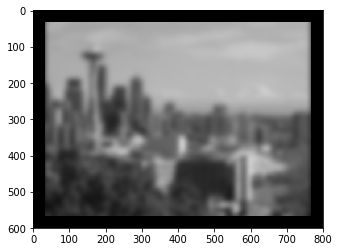

In [8]:
#2 Implement the function SeparableGaussianBlurImage (image, sigma) to Gaussian blur an image using
# separable filters. "sigma" is the standard deviation of the Gaussian. The separable filter should first
# Gaussian blur the image horizontally, followed by blurring the image vertically. The final image should
# look the same as when blurring the image with GaussianBlurImage.

# build 1D Gaussian filter (used for both vertical and horizontal Gaussian blur as they are identical filters)
def createOneDimGaussianFilter(sigma):
    # create gaussian filter 
    filter_size = 2 * int(4 * sigma + 0.5) + 1
    gaussian_filter = np.zeros((filter_size),np.float32) # Return a new array of given shape and type, filled with zeros

    for i in range(filter_size):
        xy = i - filter_size // 2 # floor division by 2 for X or Y direction
        gaussian_filter[i] = 1 / math.sqrt((2 * np.pi * sigma ** 2)) * np.exp(-(xy ** 2)/(2 * sigma ** 2))
    return gaussian_filter

# perform Horizontal Gaussian blur
def HorizontalGaussianBlur(input2dim, kernel):
    image_h = input2dim.shape[0]
    image_w = input2dim.shape[1]
    kernelSize = kernel.size
    # [k] represents the center of kernel when placed over the input image  
    k = kernelSize // 2 
    
    # initialize output matrix with zeros with input image dimensions
    image_conv = np.zeros(input2dim.shape)
    
    for i in range(k,image_h-k):
        for j in range(k,image_w-k):
            sum = 0
            for m in range(kernelSize):
                sum += kernel[m] * input2dim[i-k+m][j] # traverse the width of image for horizontal convolution
            image_conv[i][j] = sum
    return image_conv

# perform Vertical Gaussian Blur
def VerticalGaussianBlur(input2dim, kernel):
    image_h = input2dim.shape[0]
    image_w = input2dim.shape[1]
    kernelSize = kernel.size
    # [k] represents the center of kernel when placed over the input image  
    k = kernelSize // 2 
    
    # initialize output matrix with zeros with input image dimensions
    image_conv = np.zeros(input2dim.shape)
    
    for i in range(k,image_h-k):
        for j in range(k,image_w-k):
            sum = 0
            for m in range(kernelSize):
                sum += kernel[m] * input2dim[i][j-k+m] # traverse the height of image for vertical convolution
            image_conv[i][j] = sum
    return image_conv

def SeparableGaussianBlurImage(image, sigma):
    input3dim = np.asarray(Image.open(image)) # (600, 800, 3)
    input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel to simplify the convolution 
        
    # create one dimensional Gaussian filter
    kernel1dim = createOneDimGaussianFilter(sigma)

    # perform horizontal Gaussian blur
    tempOutput = HorizontalGaussianBlur(input2dim, kernel1dim)
    
    # perform vertical Gaussian blur on tempOutput and return
    return VerticalGaussianBlur(tempOutput, kernel1dim)
    
    
# Required: Gaussian blur the image "Seattle.jpg" with a sigma of 4.0, and save as "2.png".
# outputImg = SeparableGaussianBlurImage('hw1_data/Seattle.jpg', 2)
# outputImg = SeparableGaussianBlurImage('hw1_data/Seattle.jpg', 4)
outputImg = SeparableGaussianBlurImage('hw1_data/Seattle.jpg', 8)
plt.imshow(Image.fromarray(outputImg))
# imageio.imwrite("2.png",outputImg)

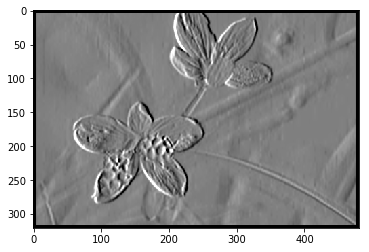

In [11]:
# 3. Implement the functions FirstDerivImage(image, sigma) and SecondDerivImage(image, sigma) to filter
# an image with the first and second derivatives of the Gaussian. "sigma" is the standard deviation of
# the Gaussian. The first derivative should be computed along the x-axis with a regular Gaussian, while
# the second derivative should be computed in both directions, i.e., the Mexican hat filter. Hint: To
# compute the first derivative, first compute the x-derivative of the image, followed by Gaussian blurring
# the image (see slide in Filters). You can use a similar trick for the second derivative (see slide in
# Filters.)
# Remember to add 128 to the final pixel values, so you can see the negative values.
# Required: Compute the first and second derivatives with a sigma of 1.0 for the image "LadyBug.jpg" and save as "3a.png" and "3b.png".

# http://mccormickml.com/2013/02/26/image-derivative/

def FirstDerivImage(image, sigma):
    input3dim = np.asarray(Image.open(image)) 
    input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel to simplify the convolution 
    
    # compute x-derivative of the image by computing the central difference with a x-derivative mask (i.e. Prewitt operator)
    fxMask = np.array([[-1, 0, 1],
                       [-1, 0, 1],
                       [-1, 0, 1]])
    
    # Prewitt is used for the first derivative. I will be using a Sobel mask in question 5. Roberts mask is another option for implementing gradient.
    
    image_h = input2dim.shape[0]
    image_w = input2dim.shape[1]
    mask_h = fxMask.shape[0]
    mask_w = fxMask.shape[1]
    # [h,w] represents the center of kernel when placed over the input image  
    h = mask_h // 2 
    w = mask_w // 2
    
    # initialize output matrix with zeros with input image dimensions
    fxImg = np.zeros(input2dim.shape)

    for i in range(h,image_h-h):
        for j in range(w,image_w-w):
            conv = 0
            for m in range(mask_h):
                for n in range(mask_w):
                    # border pixels within the image must be convolved with zero
                    if (i-h+m == 0 or j-w+n == 0):
                        conv += 0
                    else:
                        conv += fxMask[m][n] * input2dim[i-h+m][j-w+n]
            # add 128 (a neutral grey) to the final pixel values to see the negative values
            fxImg[i][j] = conv + 128
            
    # Gaussian blur the derived image with sigma of 1.0
    # Make sure the previous cells have been executed prior to this one 
    # create one dimensional Gaussian filter
    kernel1dim = createOneDimGaussianFilter(sigma)
    # perform horizontal Gaussian blur
    tempOutput = HorizontalGaussianBlur(fxImg, kernel1dim)
    # perform vertical Gaussian blur on tempOutput and return
    return VerticalGaussianBlur(tempOutput, kernel1dim)

outputImg1 = FirstDerivImage('hw1_data/LadyBug.jpg', 1.0)
plt.imshow(Image.fromarray(outputImg1))
# imageio.imwrite("3a.png",outputImg1)

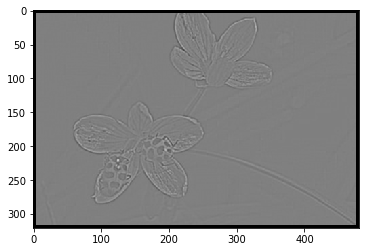

In [35]:
def SecondDerivImage(image, sigma):
    input3dim = np.asarray(Image.open(image)) 
    input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel to simplify the convolution 
    
    # compute second derivative in both x and y direction with basic second derivative filter (i.e. Discrete Laplacian)
    # https://en.wikipedia.org/wiki/Discrete_Laplace_operator
    f2xyMask = np.array([[0, -1, 0],
                          [-1, 4, -1],
                          [0, -1, 0]])
    
    image_h = input2dim.shape[0]
    image_w = input2dim.shape[1]
    mask_h = f2xyMask.shape[0]
    mask_w = f2xyMask.shape[1]
    # [h,w] represents the center of kernel when placed over the input image  
    h = mask_h // 2 
    w = mask_w // 2
    
    # initialize output matrix with zeros with input image dimensions
    f2xyImg = np.zeros(input2dim.shape)
    
    for i in range(h,image_h-h):
        for j in range(w,image_w-w):
            conv = 0
            for m in range(mask_h):
                for n in range(mask_w):
                    # border pixels within the image must be convolved with zero
                    if (i-h+m == 0 or j-w+n == 0):
                        conv += 0
                    else:
                        conv += f2xyMask[m][n] * input2dim[i-h+m][j-w+n]
            # add 128 (a neutral grey) to the final pixel values to see the negative values
            f2xyImg[i][j] = conv + 128
    
    # Gaussian blur the derived image with sigma of 1.0
    # Make sure the previous cells have been executed prior to this one 
    kernel = createGaussianFilter(sigma) 
    
    image_h = f2xyImg.shape[0]
    image_w = f2xyImg.shape[1]
    kernel_h = kernel.shape[0]
    kernel_w = kernel.shape[1]
    # [h,w] represents the center of kernel when placed over the input image  
    h = kernel_h // 2 
    w = kernel_w // 2
    
    # initialize output matrix with zeros with input image dimensions
    image_conv = np.zeros(f2xyImg.shape)
    for i in range(h,image_h-h):
        for j in range(w,image_w-w):
            conv = 0
            for m in range(kernel_h):
                for n in range(kernel_w):
                    conv += kernel[m][n] * f2xyImg[i-h+m][j-w+n]
            image_conv[i][j] = conv
    return image_conv

outputImg2 = SecondDerivImage('hw1_data/LadyBug.jpg', 1.0)
plt.imshow(Image.fromarray(outputImg2))
# imageio.imwrite("3b.png",outputImg2)

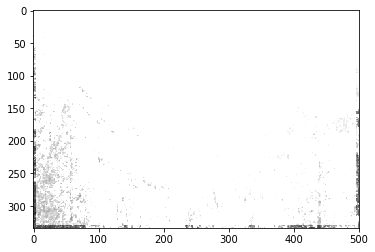

In [47]:
# 4. Implement the function SharpenImage(image, sigma, alpha) to sharpen an image. "sigma" is the
# Gaussian standard deviation and alpha is the scale factor (see slide in Filters.) Hint: Use SecondDerivImage.
# Required: Sharpen "Yosemite.png" with a sigma of 1.0 and alpha of 5.0 and save as "4.png".

# https://www.slideshare.net/PreethaHelen/sharpening-spatial-filters-67662870

def SharpenImage(image, sigma, alpha):
    input3dim = np.asarray(Image.open(image)) 
    input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel to simplify the convolution 
    
    # taking the derivative of an image results in sharpening the image. Therefore we can use SecondDerivImage such that 
    # we subtract the derived image from the original to achieve a sharpened image, provided the sigma values are the same.
    # This is called Unsharp Masking (Highpass = Original - Lowpass). Unsharp masking happens when the alpha value is equal to 1.
    # There is also High Boost sharpening when alpha is greater than 1 (Highboost = (alpha - 1)Original + Highpass).
    
    if (sigma == 1):
        # sigma values are the same from Laplacian filtering from question 3 and therefore can be re-used.
        derived = SecondDerivImage(image, sigma)
        if (alpha >= 1):
            if (input2dim.shape == derived.shape):
                sharpenedImg = ((alpha - 1) * input2dim) + derived
    
    return sharpenedImg

outputImg = SharpenImage('hw1_data/Yosemite.png', 1.0, 5.0)
plt.imshow(Image.fromarray(outputImg))
# imageio.imwrite("4.png",outputImg)

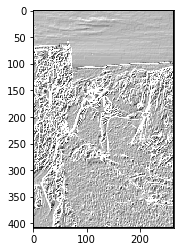

In [9]:
# 5. Implement SobelImage(image) to compute edge magnitude and orientation information. SobelImage
# should display the magnitude and orientation of the edges in an image. Please use "rgb2gray" command
# in Matlab to convert color image into a gray scale image and then run the filter on that.
# Required: Compute Sobel edge filter on "LadyBug.jpg" and save as "5a.png" and "5b.png".

# https://dsp.stackexchange.com/questions/51726/is-it-possible-to-combine-two-sobel-kernels-into-one

# use Sobel operator to compute magnitude information
def SobelImage(image):
    input3dim = np.asarray(Image.open(image)) 
    input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel to simplify the convolution 
    
    xSobelMask = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])
    ySobelMask = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])
    
    image_h = input2dim.shape[0]
    image_w = input2dim.shape[1]
    mask_h1 = xSobelMask.shape[0] # identical for ySobel
    mask_w1 = xSobelMask.shape[1] # identical for ySobel
    
    # [h,w] represents the center of kernel when placed over the input image and is identical in size for x and y  
    h = mask_h1 // 2 
    w = mask_w1 // 2
    
    # initialize output matrix with zeros with input image dimensions
    xSobelOutput = np.zeros(input2dim.shape)
    ySobelOutput = np.zeros(input2dim.shape)
    for i in range(h,image_h-h):
        for j in range(w,image_w-w):
            conv_x = 0
            conv_y = 0
            for m in range(mask_h1):
                for n in range(mask_w1):
                    # border pixels within the image must be convolved with zero
                    if (i-h+m == 0 or j-w+n == 0):
                        conv_x += 0
                        conv_y += 0
                    else:
                        conv_x += xSobelMask[m][n] * input2dim[i-h+m][j-w+n]
                        conv_y += ySobelMask[m][n] * input2dim[i-h+m][j-w+n]
            xSobelOutput[i][j] = conv_x + 128
            ySobelOutput[i][j] = conv_y + 128

    x2Sobel = np.square(xSobelOutput) 
    y2Sobel = np.square(ySobelOutput)
    x2y2Sobel = np.add(x2Sobel,y2Sobel)
    return np.sqrt(x2y2Sobel)
    
# outputImg = SobelImage('hw1_data/LadyBug.jpg')
outputImg = SobelImage('hw1_data/TightRope.png')
plt.imshow(Image.fromarray(outputImg))
# imageio.imwrite("5a.png",outputImg)

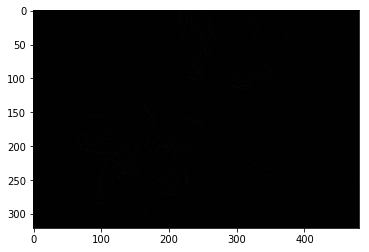

In [109]:
# use Sobel operator to compute orientation/direction information

def SobelImage(image):
    input3dim = np.asarray(Image.open(image)) 
    input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel to simplify the convolution 
    
    xSobelMask = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])
    ySobelMask = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])
    
    image_h = input2dim.shape[0]
    image_w = input2dim.shape[1]
    mask_h1 = xSobelMask.shape[0] # identical for ySobel
    mask_w1 = xSobelMask.shape[1] # identical for ySobel
    
    # [h,w] represents the center of kernel when placed over the input image and is identical in size for x and y  
    h = mask_h1 // 2 
    w = mask_w1 // 2
    
    # initialize output matrix with zeros with input image dimensions
    xSobelOutput = np.zeros(input2dim.shape)
    ySobelOutput = np.zeros(input2dim.shape)
    for i in range(h,image_h-h):
        for j in range(w,image_w-w):
            conv_x = 0
            conv_y = 0
            for m in range(mask_h1):
                for n in range(mask_w1):
                    # border pixels within the image must be convolved with zero
                    if (i-h+m == 0 or j-w+n == 0):
                        conv_x += 0
                        conv_y += 0
                    else:
                        conv_x += xSobelMask[m][n] * input2dim[i-h+m][j-w+n]
                        conv_y += ySobelMask[m][n] * input2dim[i-h+m][j-w+n]
            xSobelOutput[i][j] = conv_x + 128
            ySobelOutput[i][j] = conv_y + 128
               
    theta = np.arctan2(ySobelOutput,xSobelOutput)
    return (np.round(theta * (5.0 / np.pi)) + 5) % 5 # Quantize direction

outputImg = SobelImage('hw1_data/LadyBug.jpg')
plt.imshow(Image.fromarray(outputImg))
# imageio.imwrite("5b.png",outputImg)

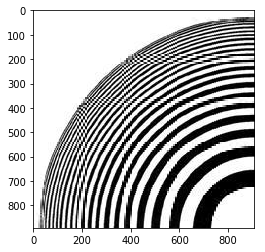

In [91]:
# 6. Implement BilinearInterpolation(image, x, y) to compute the linearly interpolated pixel value at (x,y). Both x and y are continuous values.
# Required: Upsample image "Moire_small.jpg" to be 4 times larger once with nearest neighbor interpolation and save as "6a.png" and once with bilinear interpolation and save as "6b.png".

# upsample to be 4 times larger with nearest neighbor interpolation
def BiLinearInterpolation(image, x, y):
    input3dim = np.asarray(Image.open(image)) 
    input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel to simplify the convolution 
    # 227 x 223 means width x height so shape is (height,width) or (y,x) or (223,227) ... so f*cking confusing.
    height = input2dim.shape[0] # 223
    width = input2dim.shape[1] # 227
    newWid = x # columns
    newHt = y # rows
    target = np.zeros(((newHt,newWid))) # (y,x)
                      
    for i in range(0,newWid):
        for j in range(0,newHt):
            srcX = int( round( float(i) / float(newWid) * float(width) ) )
            srcY = int( round( float(j) / float(newHt) * float(height) ) )
            srcX = min( srcX, width-1)
            srcY = min( srcY, height-1)
            target[j][i] = input2dim[srcY][srcX]
    return target
                      
# first calculate the correct x and y such that the output scales by 4
input3dim = np.asarray(Image.open('hw1_data/Moire_small.jpg')) 
input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel 
image_h = input2dim.shape[0] # height = 223 = y
image_w = input2dim.shape[1] # width = 227 = x

outputImg = BiLinearInterpolation('hw1_data/Moire_small.jpg', image_w * 4, image_h * 4)
plt.imshow(Image.fromarray(outputImg))
# imageio.imwrite("6a.png",outputImg)



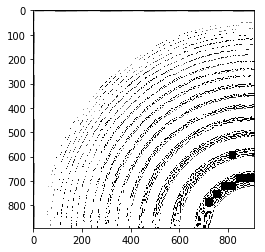

In [102]:
# FYI ... Linear interpolation - Surveys the 2 closest pixels, drawing a line between them and designating a value along that line as the output pixel value.
# Bilinear interpolation surveys 4 closest pixels creates a weighted average based on the nearness and brightness of the surveyed pixels and assigns that value to the pixel in the output image.

# upsample to be 4 times larger with bilinear interpolation
def BiLinearInterpolation(image, x, y):
    input3dim = np.asarray(Image.open(image)) 
    input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel 
    image_h = input2dim.shape[0] # height = 223 
    image_w = input2dim.shape[1] # width = 227 
    newHt = y # rows
    newWid = x # columns
    scaleHt = image_h / newHt
    scaleWid = image_w / newWid
    
    target = np.zeros(((newHt,newWid))) # (y,x)
    
    for m in range(0,newWid): # x for column indices of output
        for n in range(0,newHt): # y for row indices of output
            # scale by 4
            nOut = n * scaleHt
            mOut = m * scaleWid
            # integer part of (nOut,mOut)
            nFloor = int(nOut)
            mFloor = int(mOut)
            # fractional part of (n,m)
            nDelta = nOut - nFloor
            mDelta = mOut - mFloor
            
            # 4 neighbors for each (n,m)
            target[n][m] = int(0.5+((input2dim[nFloor][mFloor] * (1-nFloor) * (1-mFloor)) + (input2dim[min(nFloor+1,image_h-1)][mFloor] * (nDelta) * (1-mDelta)) + (input2dim[nFloor][min(mFloor+1,image_w-1)] * (1-nDelta) * (mDelta)) + (input2dim[min(nFloor+1,image_h-1)][min(mFloor+1,image_w-1)] * (nDelta) * (mDelta))))
    return target

# first calculate the correct x and y such that the output scales by 4
input3dim = np.asarray(Image.open('hw1_data/Moire_small.jpg')) 
input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel 
image_h = input2dim.shape[0] # height = 223 
image_w = input2dim.shape[1] # width = 227 

outputImg = BiLinearInterpolation('hw1_data/Moire_small.jpg', image_w * 4, image_h * 4)
plt.imshow(Image.fromarray(outputImg))
# imageio.imwrite("6b.png",outputImg)

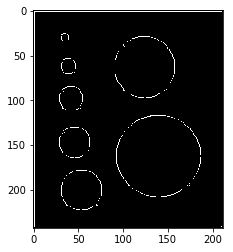

In [111]:
# 7. Implement FindPeaksImage(image, thres) to find the peak edge responses perpendicular to the edges.
# The edge magnitude and orientations can be computed using the Sobel filter you just implemented. A
# peak response is found by comparing a pixel's edge magnitude to two samples perpendicular to an edge
# at a distance of one pixel (slide "Non-maximum suppression" in EdgeDetection), call these two samples
# e0 and e1. Compute e0 and e1 using BilinearInterpolation. A pixel is a peak response if it is larger
# than the threshold ("thres"), e0, and e1. Assign the peak responses a value of 255 and everything else 0.
# Required: Find the peak responses in "Circle.png" with thres = 40.0 and save as "7.png".

def FindPeaksImage(image, thres):

    image_h = input2dim.shape[0] 
    image_w = input2dim.shape[1] 
    
    # first use sobel to get the pixel's edge magnitude
    xSobelMask = np.array([[-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1]])
    ySobelMask = np.array([[-1, -2, -1],
                          [0, 0, 0],
                          [1, 2, 1]])
    
    mask_h1 = xSobelMask.shape[0] # identical for ySobel
    mask_w1 = xSobelMask.shape[1] # identical for ySobel
    
    # [h,w] represents the center of kernel when placed over the input image and is identical in size for x and y  
    h = mask_h1 // 2 
    w = mask_w1 // 2
    
    # initialize output matrix with zeros with input image dimensions
    xSobelOutput = np.zeros(input2dim.shape)
    ySobelOutput = np.zeros(input2dim.shape)
    for i in range(h,image_h-h):
        for j in range(w,image_w-w):
            conv_x = 0
            conv_y = 0
            for m in range(mask_h1):
                for n in range(mask_w1):
                    # border pixels within the image must be convolved with zero
                    if (i-h+m == 0 or j-w+n == 0):
                        conv_x += 0
                        conv_y += 0
                    else:
                        conv_x += xSobelMask[m][n] * input2dim[i-h+m][j-w+n]
                        conv_y += ySobelMask[m][n] * input2dim[i-h+m][j-w+n]
            xSobelOutput[i][j] = conv_x + 128
            ySobelOutput[i][j] = conv_y + 128

#     x2Sobel = np.square(xSobelOutput) 
#     y2Sobel = np.square(ySobelOutput)
#     x2y2Sobel = np.add(x2Sobel,y2Sobel)
#     magHisto = np.sqrt(x2y2Sobel)
    grad = np.power(np.power(xSobelOutput, 2.0) + np.power(ySobelOutput, 2.0), 0.5)
    theta = np.arctan2(ySobelOutput, xSobelOutput)
    thetaQ = (np.round(theta * (5.0 / np.pi)) + 5) % 5 # Quantize direction for bilinear interpolation
    
    responses = np.zeros(grad.shape) # start wiith zeros
    for r in range(image_h):
        for c in range(image_w):
            # Suppress pixels at the image edge
            if r == 0 or r == image_h-1 or c == 0 or c == image_w - 1:
                continue
            tq = thetaQ[r, c] % 4
            
            # or instead of quantifying the theta, assign e0 and e1 to x and y direction respectively

            if tq == 0: #0 is E-W (horizontal)
                if grad[r, c] > grad[r, c-1] and grad[r, c] > grad[r, c+1] and grad[r, c] > thres:
                    responses[r, c] = 255
            if tq == 1: #1 is NE-SW
                if grad[r, c] > grad[r-1, c+1] and grad[r, c] > grad[r+1, c-1] and grad[r, c] > thres:
                    responses[r, c] = 255
            if tq == 2: #2 is N-S (vertical)
                if grad[r, c] > grad[r-1, c] and grad[r, c] > grad[r+1, c] and grad[r, c] > thres:
                    responses[r, c] = 255
            if tq == 3: #3 is NW-SE
                if grad[r, c] > grad[r-1, c-1] and grad[r, c] > grad[r+1, c+1] and grad[r, c] > thres:
                    responses[r, c] = 255
    return responses

input3dim = np.asarray(Image.open('hw1_data/Circle.png')) 
input2dim = input3dim[:, :, 0] # convert to grayscale by removing the 3rd channel 
outputImg = FindPeaksImage(input2dim,40.0) # this is so that I can pass in a prefiltered image into the function as a 2D nd array
plt.imshow(Image.fromarray(outputImg))
# imageio.imwrite("7.png",outputImg)

########## Section 2: Written Assignment ##########

1.Run GaussianBlurImage and SeparableGaussianBlurImage with sigma = 2, 4, 8 on Seattle.jpg. How
many seconds does it take to run each function? How long do you think it would take to run each with sigma = 32?

<table style="text-align:center">
    <tr>
        <th>sigma (Seattle.jpg)</th>
        <th>GaussianBlurImage runtime</th>
        <th>SeparableGaussianBlurImage runtime</th>
    </tr>
    <tr> 
        <td>2</td>
        <td>4m 16s</td>
        <td>56.3s</td>
    </tr>
    <tr> 
        <td>4</td>
        <td>16m</td>
        <td>1m 45s</td>
    </tr>
    <tr> 
        <td>8</td>
        <td>30+m</td>
        <td>1m 34s</td>
    </tr>
</table>

Based on my environment and runtimes recorded above, with sigma = 32, I suspect that GaussianBlur would take approx. 4 hours and SeparableGaussianBlur would take approx 1 min.


2.What is the best amount of blur to apply when down-sampling Moire.jpg by 8x (pressing Half Size 3
times)? Does down-sampling Seattle.jpg require the same amount of blur?

For downsampling Moire.jpg by 8x, the best amount of blur to apply would be 6x the size of the original filter. 
No because the initial amount of blur depends on the image pattern to remove aliasing after applying the blur filter.
What remains the same is the rate and scale in which the blur amount is changed, depending on how much one down-samples the image.

3.Can you find an edge in TightRope.png that is visible to the human eye, but does not have a strong
response from the Sobel edge detector?
Because change of image intensity is usually measured by the magnitude of the image gradient, I process the image with the sobel function that computes and generates an image displaying its magnitude profile. By human eye, I find the edge to be most salient from the side of the mountain on the left. However it is possible to have minimal change in intensity across a real world understanding of depth, among other things. As a result, such magnitude pixels may end up being suppressed for not being a local maximum. Upon processing with the magnitude operator, I feel it is difficult to distinguish the edges of the person and the edges of the mountain cliff. The gradient profiles are meshed together.

4.If you rotate the image 20 times by 2 degrees, does it produce the same result as rotating the image
by 40 degrees? If not, why? Please use "imrotate" command in Matlab.

It will not be the same because after every rotation, you can see that the image is cropped off for failing to scale appropriately. Each rotation uses some kind of interpolation across the source image to reproduce the target image. By the 20th rotation, the source image is drastically different than the one that the single 40 degree rotation used to produce the target image.

In [20]:
im1 = Image.open("hw1_data/TightRope.png")
plt.imshow(im1.rotate(40))


SyntaxError: invalid syntax (<ipython-input-20-af2f0b2ffd46>, line 6)

5.If you apply blur before applying FindPeaksImage you can remove many noisy edges. What is the
best amount of blur to apply to Gogh.png to find the cleanest edges? In addition to answering these
questions, please turn in your best peak edge image called GoghEdge.png.

In [ ]:
prefilterImg = SeparableGaussianBlurImage('hw1_data/Gogh.png', 2)
outputImg = FindPeaksImage(prefilterImg,40.0)
plt.imshow(Image.fromarray(outputImg))
# imageio.imwrite("GoghEdge.png",outputImg)